In [1]:
from plotting_util import *
from reading_util import *

In [2]:
def plot_step( x, ys, labels, xlabel, title, ylim=None):
    plt.figure()
    for y, label in zip(ys,labels):
        plt.step(x,y,label=label)
    plt.legend()
    plt.yscale('log')
    plt.ylim(ylim)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()
    #plt.savefig(os.path.join(fig_dir,'qcd_signalreg_vs_GtoTTbarBroad_before_vae_cut.png'))
    plt.close()

In [3]:
file_dir = 'fig/pt_normalized/training_without_pt_cut/qcd_signal_10pct_qr_train/qr_1pct'
file_path = os.path.join(file_dir,'vae_boost_bin_counts.h5')
bin_counts, bin_edges, dataset_names = read_data_from_file(file_path)
bin_edges = bin_edges[:-1]
print(dataset_names)
data = {}
for i, name in enumerate(dataset_names):
    data[name] = bin_counts[i]


['qcdSigExt' 'GtoTTBroad' 'GtoTTNarr' 'GtoWW4' 'AtoHZ' 'GtoWW1' 'GtoWW2'
 'GtoWW3']


In [4]:
h_t_bg = data['qcdSigExt'][0]
h_a_bg = data['qcdSigExt'][1]
h_r_bg = h_t_bg - h_a_bg

In [5]:
h_t_sig = data['GtoWW1'][0]
h_a_sig = data['GtoWW1'][1]
h_r_sig = h_t_sig - h_a_sig

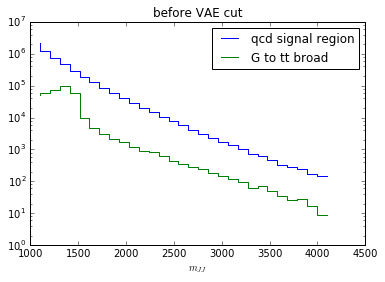

In [6]:
plot_step(bin_edges,[h_t_bg,h_t_sig],['qcd signal region','G to tt broad'],xlabel=r'$m_{JJ}$',title='before VAE cut')

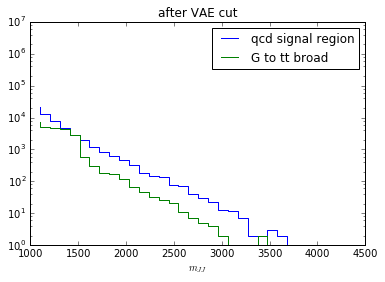

In [7]:
plot_step(bin_edges,[h_a_bg,h_a_sig],['qcd signal region','G to tt broad'],xlabel=r'$m_{JJ}$',title='after VAE cut',ylim=(1,1e7))

# check qcd signalregion sample

In [32]:
vae_model = 'pt_normalized'
vae_train_data = 'training_without_pt_cut'
base_dir = os.path.join('/eos/project/d/dshep/TOPCLASS/DijetAnomaly/VAE_results',vae_model,vae_train_data)
data_sample = 'qcd_sqrtshatTeV_13TeV_PU40_EXT2'
file_dir = os.path.join(base_dir,data_sample)
print(file_dir)

/eos/project/d/dshep/TOPCLASS/DijetAnomaly/VAE_results/pt_normalized/training_without_pt_cut/qcd_sqrtshatTeV_13TeV_PU40_EXT2


In [33]:
fig_dir = 'fig/input_data_analysis'

In [34]:
qcd_data_total, labels = read_in_data( file_dir )
print( 'num events qcd signal region: ', qcd_data_total.shape[0] )

('reading ', '/eos/project/d/dshep/TOPCLASS/DijetAnomaly/VAE_results/pt_normalized/training_without_pt_cut/qcd_sqrtshatTeV_13TeV_PU40_EXT2')
('num files in dir:', 2872)
Labels:
['mJJ', 'j1Pt', 'j1Eta', 'j1Phi', 'j1M', 'j1E', 'j2Pt', 'j2M', 'j2E', 'DeltaEtaJJ', 'DeltaPhiJJ', 'j1TotalLoss', 'j1RecoLoss', 'j1KlLoss', 'j2TotalLoss', 'j2RecoLoss', 'j2KlLoss']
[--------------------]  0% - ETA: 51.8 h   ('\nnum files read in dir ', '/eos/project/d/dshep/TOPCLASS/DijetAnomaly/VAE_results/pt_normalized/training_without_pt_cut/qcd_sqrtshatTeV_13TeV_PU40_EXT2', ': ', 2872)
('num events qcd signal region: ', 888876)


In [35]:
from writing_util import *
output_name = data_sample + '_mjj_cut_1100GeV_concat.h5'
write_data_to_file( [qcd_data_total,labels], ['results','labels'], os.path.join(file_dir,output_name) )

In [36]:
mjj_min = np.min(qcd_data_total[:,0])
mjj_max = np.max(qcd_data_total[:,0])
print(mjj_min,mjj_max)

(1100.0001220703125, 5965.765625)


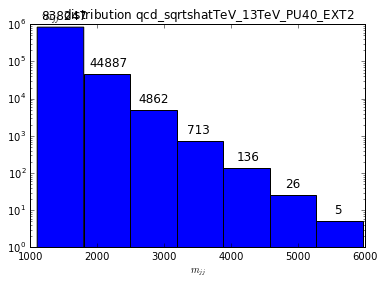

In [38]:
plt.clf()
plt.figure()
bin_counts, bin_edges, _ = plt.hist(qcd_data_total[:,0],bins=7)
for i, n, in zip(bin_edges,bin_counts):
    plt.text(i*1.05, n*2, str(int(n)), va='center', fontsize=12)
plt.yscale('log')
plt.title(r'$m_{jj}$ distribution ' + data_sample)
plt.xlabel(r'$m_{jj}$')
plt.show()
plt.savefig(os.path.join(fig_dir,data_sample+'_mjj_hist.png'))
plt.close()